In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
import warnings
warnings.filterwarnings('ignore')

获取具备预设相关系数的随机数序列


https://bigdata-s3.wmcloud.com/researchreport/cc/4ed6181eabb6a1959c90312042215349.pdf



<img style="float: left;" src="123.png" width="80%"> 


In [2]:
def corr_random(n,mean,cov):
    '''
    功能：获取具备预设相关系数的随机数序列  作为股票收益率时间序列
    输入：1.随机数长度n
          2.随机数均值mean
          3.协方差矩阵cov
    输出：随机数array 满足协方差矩阵
    '''
    # np.random.seed(0)
    num_samples = n
    mu = mean
    r = cov
    rng = np.random.default_rng()
    # 生成正态随机数序列
    y = rng.multivariate_normal(mu, r, num_samples,check_valid = 'raise',tol = 1e-8,method = 'cholesky')
    return y


# 输入一个给定的协方差矩阵

In [3]:
n = 10000
mean = np.array([0.0, 0.0, 0.0])
rcov = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])
#调用函数
rdata = corr_random(n,mean,rcov)

<AxesSubplot:>

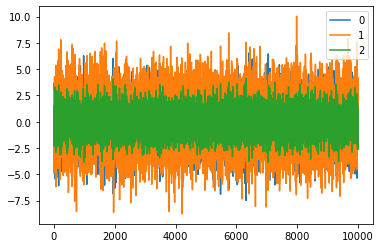

In [4]:
# 绘制符合rcov要求的随机数变化图
rdata = pd.DataFrame(rdata)
rdata.plot()

In [5]:
#检查cov是否与给定一致
temp = rdata.cov()
temp

,0,1,2
0,3.339343,-2.700612,-1.963702
1,-2.700612,5.466502,1.470935
2,-1.963702,1.470935,1.227653


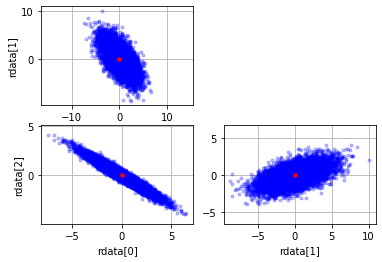

In [6]:
#观察生成的随机序列之间的散点图相关性
plt.subplot(2,2,1)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,1], 'b.', alpha=0.25)
plt.plot(mean[0], mean[1], 'ro', ms=3.5)
plt.ylabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[0], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[0]')
plt.ylabel('rdata[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(rdata.iloc[:,1], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[1], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

# 输入一个随机生成的半正定协方差矩阵

In [50]:
n = 100000
N = 3#资产个数
mean = np.zeros(N)#各股票日收益率均值均设为0

# 产生随机相关系数矩阵
def simLD(n,s=1,sp=0):
    '''功能：随机生成相关系数矩阵
       输入：n:矩阵阶数
             s:相关程度系数，越接近0.5越不相关（s是元素为负数的概率）
             sp：稀疏程度，越接近1越稀疏
       输出：相关系数矩阵A'''
    D = np.random.random((n, n))# 生成N阶随机矩阵D
    D = D*np.select([D>sp], [1])

    B = np.random.uniform(size=(n, n))
    R = np.random.random((n,n))*s

    C = (D / D.sum(0)) ** (1 / 2) * np.select([B<=R,s>R], [-1,1])# 将D变换为行元素平方和为一的矩阵C
    A = np.mat(C).T * np.mat(C)
    return A
rrho = simLD(N,0.99,0)



# 随机产生N个方差 值位于0-10之间？
rsigma_list = (np.random.randint(0,10,N) + np.random.random(N))
rsigma = np.diag(rsigma_list)

rcov = np.sqrt(np.matrix(rsigma)) @ np.matrix(rrho) @ np.sqrt(np.matrix(rsigma))
#判断产生的cov是否为半正定矩阵
def is_pos_def(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return '是半正定矩阵'
        except np.linalg.LinAlgError:
            return '不是半正定矩阵-1'
    else:
        if np.allclose (A, A.T, rtol = 1e-05 , atol = 1e-08 , equal_nan = False ):
            try:
                np.linalg.cholesky(A)
                return '是半正定矩阵'
            except np.linalg.LinAlgError:
                return '不是半正定矩阵-1'
        else:
            return '不是半正定矩阵-2'

In [51]:
print(is_pos_def(rcov))
print(is_pos_def(rrho))

是半正定矩阵
是半正定矩阵


<AxesSubplot:>

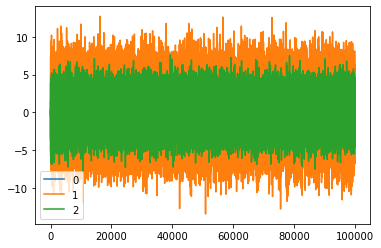

In [52]:
rdata = corr_random(n,mean,rcov)
# 绘制随机数变化图
rdata = pd.DataFrame(rdata)
rdata.plot()

In [53]:
#检查cov是否与给定一致????
temp = rdata.cov()
tempcorr = rdata.corr()
print('得到的随机数序列的cov')
temp

得到的随机数序列的cov


,0,1,2
0,0.023087,0.307696,-0.034106
1,0.307696,9.227027,-3.651676
2,-0.034106,-3.651676,3.362193


In [54]:
print('输入函数的预定cov')
pd.DataFrame(rcov)

输入函数的预定cov


,0,1,2
0,0.023255,0.308512,-0.033542
1,0.308512,9.218909,-3.632746
2,-0.033542,-3.632746,3.350326


In [55]:
print('得到的随机数序列的corr')
tempcorr

得到的随机数序列的corr


,0,1,2
0,1.000000,0.666661,-0.122413
1,0.666661,1.000000,-0.655617
2,-0.122413,-0.655617,1.000000


In [56]:
print('输入函数的预定corr')
rrho

输入函数的预定corr


matrix([[ 1.        ,  0.66631344, -0.12016914],
        [ 0.66631344,  1.        , -0.65365966],
        [-0.12016914, -0.65365966,  1.        ]])

# 输入一个非半正定的协方差矩阵

In [34]:
#生成一个非半正定的相关系数矩阵
#产生N*N的相关系数矩阵 数据位于-0.9 0.9 之间
rrho= np.random.random((N,N)) *(np.random.choice([-0.8, 0.8],(N,N)))
row, col = np.diag_indices_from(rrho) 
rrho[row, col] = [1] * len(rrho)#对主对角线进行赋值
for i in range(N):#对下三角位置进行赋值
    for j in range(i,N):
        rrho[i,j] = rrho[j,i]

In [35]:
#判断产生的corr是否为半正定矩阵   -1代表无法进行cholesky分解
print(is_pos_def(rrho))

不是半正定矩阵-1


In [36]:
# 随机产生N个方差 值位于0-10之间？
rsigma_list = (np.random.randint(0,10,N) + np.random.random(N))
rsigma = np.diag(rsigma_list)
rcov = np.sqrt(np.matrix(rsigma)) @ np.matrix(rrho) @ np.sqrt(np.matrix(rsigma))
#判断产生的cov是否为半正定矩阵
print(is_pos_def(rcov))

不是半正定矩阵-1


协方差阵的目的就是用来求一组具备给定协方差关系/相关关系的随机数序列


如果协方差阵非正定？那么不能使用cholesky分解，从而不能得到一个下三角矩阵L


**<font color = red>使用cvxpy计算一个距离给定corr最近的（F范数）&符合半正定条件的新相关系数矩阵</font>**使其可以进行cholesky分解

https://www.cvxpy.org/api_reference/cvxpy.constraints.html

In [37]:
import cvxpy as cvx

n = N
m = 0.01 #设定求出来的corr的特征值的最小值
origin = rrho

print('修改前的相关系数矩阵为：')
print(is_pos_def(origin))
pd.DataFrame(origin)

修改前的相关系数矩阵为：
不是半正定矩阵-1


,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.474749,0.167220,0.435511,0.625318,-0.720797,-0.336236,-0.004083,0.252222,-0.782701
1,-0.474749,1.000000,0.565672,0.439595,0.325045,-0.050392,0.765662,0.161084,-0.011281,-0.099274
2,0.167220,0.565672,1.000000,-0.450712,0.654943,-0.581248,0.514355,0.532717,0.419560,0.015338
3,0.435511,0.439595,-0.450712,1.000000,0.365832,0.478482,0.339863,-0.033940,-0.299613,0.473971
4,0.625318,0.325045,0.654943,0.365832,1.000000,0.220481,0.750578,0.337275,-0.381512,-0.572370
5,-0.720797,-0.050392,-0.581248,0.478482,0.220481,1.000000,0.395829,0.221658,0.685544,0.243103
6,-0.336236,0.765662,0.514355,0.339863,0.750578,0.395829,1.000000,0.133903,-0.288808,0.362548
7,-0.004083,0.161084,0.532717,-0.033940,0.337275,0.221658,0.133903,1.000000,-0.599289,0.787504
8,0.252222,-0.011281,0.419560,-0.299613,-0.381512,0.685544,-0.288808,-0.599289,1.000000,0.663503
9,-0.782701,-0.099274,0.015338,0.473971,-0.572370,0.243103,0.362548,0.787504,0.663503,1.000000


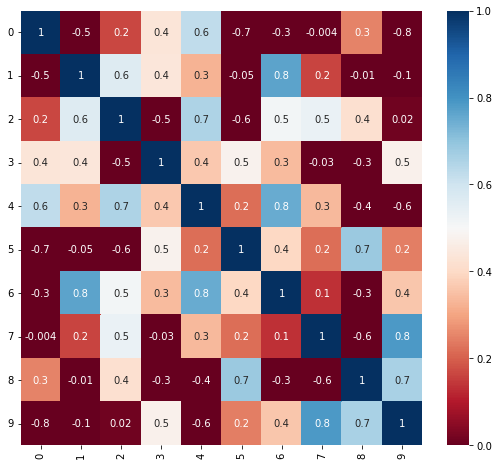

In [38]:
#绘制相关系数热力图
import seaborn as sns
f, ax = plt.subplots(figsize=(9,8))
ax = sns.heatmap(origin,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g')

#设置坐标字体方向
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [39]:
print('修改前的相关系数矩阵特征值分解如下：')
l,S = np.linalg.eig(origin)
print(l)

修改前的相关系数矩阵特征值分解如下：
[ 3.11011343  2.84581545 -1.29991662  1.92361357  1.59589405  1.38353703
  0.92833228  0.31257388 -0.30016419 -0.4997989 ]


In [40]:
x = cvx.Variable((n,n))#,symmetric=True) 
objective = cvx.Minimize(cvx.norm(x - origin,'fro')) 
constraints = [cvx.PSD(x-m*np.eye(n,n)),cvx.diag(x)==1,x==x.T] 
prob = cvx.Problem(objective, constraints) 
prob.solve() 

change_rrho = x.value

print('修改后的相关系数矩阵为：')
print(is_pos_def(change_rrho))
pd.DataFrame(change_rrho)

修改后的相关系数矩阵为：
是半正定矩阵


,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.293007,0.175119,0.169892,0.463175,-0.444852,-0.301952,-0.133615,-0.026657,-0.539684
1,-0.293007,1.000000,0.469624,0.265109,0.357669,0.019206,0.761705,0.096050,-0.103718,0.076973
2,0.175119,0.469624,1.000000,-0.318955,0.472683,-0.348790,0.415632,0.376189,0.165334,0.011421
3,0.169892,0.265109,-0.318955,1.000000,0.310580,0.370751,0.356307,0.073558,-0.152782,0.203354
4,0.463175,0.357669,0.472683,0.310580,1.000000,0.033536,0.606213,0.268856,-0.291992,-0.390669
5,-0.444852,0.019206,-0.348790,0.370751,0.033536,1.000000,0.345041,0.029782,0.346003,0.425801
6,-0.301952,0.761705,0.415632,0.356307,0.606213,0.345041,1.000000,0.301576,-0.152273,0.181901
7,-0.133615,0.096050,0.376189,0.073558,0.268856,0.029782,0.301576,1.000000,-0.311793,0.497833
8,-0.026657,-0.103718,0.165334,-0.152782,-0.291992,0.346003,-0.152273,-0.311793,1.000000,0.354476
9,-0.539684,0.076973,0.011421,0.203354,-0.390669,0.425801,0.181901,0.497833,0.354476,1.000000


In [41]:
print('修改后的相关系数矩阵特征值分解如下：')
l1,S1 = np.linalg.eig(change_rrho)
print(l1)

修改后的相关系数矩阵特征值分解如下：
[2.86544108 2.44738299 1.59043241 1.23940158 1.07593158 0.63667294
 0.11472167 0.01000956 0.01000248 0.01000367]


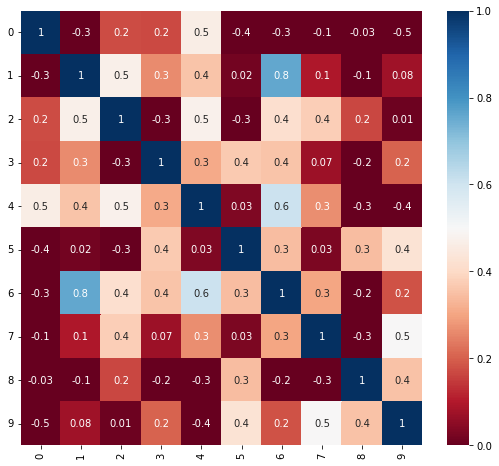

In [42]:
f, ax = plt.subplots(figsize=(9,8))
ax = sns.heatmap(change_rrho,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g')

#设置坐标字体方向
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [66]:
import os
root_path = os.path.dirname(os.path.abspath('随机数生成的讨论-论文复现.ipynb'))
root_path

'C:\\Users\\Sherry\\Desktop\\Files\\实习\\广发\\奇异期权定价\\代码'

In [67]:
from mc import MC

**一：论文 1** 复现四种情景

论文地址：

http://quantlabs.net/academy/download/free_quant_instituitional_books_/[University%20of%20the%20Witwatersrand,%20Mahomed]%20Pricing%20of%20Himalaya%20Options.pdf

和论文结果不同 可能是因为论文使用的是特定MC结构

<img style="float: left;" src="img/article_one.png" width="80%"> 

<img style="float: left;" src="img/article_one_1.png" width="80%"> 

<img style="float: left;" src="img/article_one_2.png" width="80%"> 

<img style="float: left;" src="img/scenario_one.png" width="80%"> 

<img style="float: left;" src="img/scenario_two.png" width="80%"> 

<img style="float: left;" src="img/scenario_three.png" width="80%"> 

<img style="float: left;" src="img/scenario_four.png" width="80%"> 

In [68]:
#固定值
times = 200000
step = 1/2
rf = 0.1
mineig = 0.01


#scenario one 
corr = np.ones((3,3))*0.9
row, col = np.diag_indices_from(corr) 
corr[row, col] = [1] * len(corr)#对主对角线进行赋值
sigma = [0.04,0.04,0.04]
# sigma = [0.2,0.2,0.2]
assets = [corr,sigma]
#进行蒙卡模拟
scenario_1 = MC(assets, times, step, rf, mineig, use_give=True, type_ = 'GF2')
price1 = scenario_1.mc_himalaya()
print('scenario one  GF2:' + '%.4f' % float(price1))




#scenario two  结果的相关系数和输入比较接近
corr = np.array([[1,-0.4,0.6],
                 [-0.4,1,-0.2],
                 [0.6,-0.2,1]])
sigma = [0.04,0.04,0.04]
# sigma = [0.2,0.2,0.2]
assets = [corr,sigma]
#进行蒙卡模拟
scenario_2 = MC(assets, times, step, rf, mineig, use_give=True, type_ = 'GF2')
price2 = scenario_2.mc_himalaya()
print('scenario two  GF2:' + '%.4f' % float(price2))



#scenario three
corr = np.ones((3,3))*(-0.4)
row, col = np.diag_indices_from(corr) 
corr[row, col] = [1] * len(corr)#对主对角线进行赋值
sigma = [0.04,0.04,0.04]
# sigma = [0.2,0.2,0.2]
assets = [corr,sigma]
#进行蒙卡模拟
scenario_3 = MC(assets, times, step, rf, mineig, use_give=True, type_ = 'GF2')
price3 = scenario_3.mc_himalaya()
print('scenario three  GF2:' + '%.4f' % float(price3))




#scenario four
corr = np.ones((3,3))*(0.9)
row, col = np.diag_indices_from(corr) 
corr[row, col] = [1] * len(corr)#对主对角线进行赋值
sigma = [0.04,0.0625,0.09]
# sigma = [0.2,0.25,0.3]
assets = [corr,sigma]
#进行蒙卡模拟
scenario_4 = MC(assets, times, step, rf, mineig, use_give=True, type_ = 'GF2')
price4 = scenario_4.mc_himalaya()
print('scenario four  GF2:' + '%.4f' % float(price4))



scenario one  GF2:
0.12108296223192733
scenario two  GF2:
0.19915803175965224
scenario three  GF2:
0.2312289945977077
scenario four  GF2:
0.1625040904911125


**讨论和论文有差异的原因**

**二：论文2** 复现两条曲线

论文地址：

http://fs.1473.cn/3636903a-ea8f-4e0a-89ee-7ae5ca2cc33c.pdf
<img style="float: left;" src="img/article_two.png" width="50%"> 

In [77]:
# GF1_list = []
# LF1_list = []
# for i in np.linspace(0.05, 0.95, 19):# i = 0.95
#     n = 6
#     corr = np.ones((n,n))*i
#     row, col = np.diag_indices_from(corr) 
#     corr[row, col] = [1] * len(corr)#对主对角线进行赋值
#     sigma = [0.04] * n
#     assets = [corr,sigma]
#     times = 200000
#     step = 1
#     rf = 0.0
#     mineig = 0.01
#     
#     redeem_GF1 = MC(assets, times, step, rf, mineig, use_give=True, type_ = 'GF1')
#     price_GF1 = redeem_GF1.mc_himalaya()
#     GF1_list.append(price_GF1)
#     print('redeem GF1 rho=' + '%.4f' % float(i) + ' price=' + '%.4f' % float(price_GF1))
# 
#     redeem_LF1 = MC(assets, times, step, rf, mineig, use_give=True, type_ = 'LF1')
#     price_LF1 = redeem_LF1.mc_himalaya()
#     LF1_list.append(price_LF1)
#     print('redeem LF1 rho=' + '%.4f' % float(i) + ' price=' + '%.4f' % float(price_LF1))
# 
# 
# mc_output = pd.DataFrame({'rho':np.linspace(0.05, 0.95, 19),
#                           'GF1':GF1_list,
#                           'LF1':LF1_list})
# mc_output.to_csv(r'...\GF1_list.txt')

,GF1,LF1
rho,,
0.05,0.358402,0.833809
0.10,0.386633,0.834907
0.15,0.408751,0.836565
0.20,0.431635,0.836977
0.25,0.459147,0.835933
0.30,0.479163,0.836432
0.35,0.500318,0.837592
0.40,0.522290,0.838279
0.45,0.540881,0.842403


In [82]:
mc_output = pd.read_csv(r'.\GF1_list.txt')
mc_output = mc_output[['rho','GF1','LF1']].set_index('rho')
mc_output

,GF1,LF1
rho,,
0.05,0.358402,0.833809
0.10,0.386633,0.834907
0.15,0.408751,0.836565
0.20,0.431635,0.836977
0.25,0.459147,0.835933
0.30,0.479163,0.836432
0.35,0.500318,0.837592
0.40,0.522290,0.838279
0.45,0.540881,0.842403


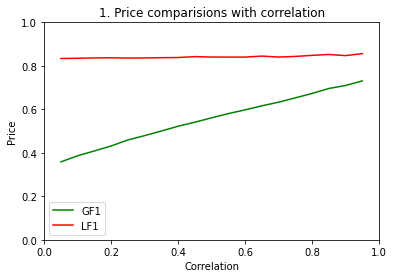

In [81]:
#绘图
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.plot(np.linspace(0.05, 0.95, 19), mc_output['GF1'], 'g',label = 'GF1')
plt.plot(np.linspace(0.05, 0.95, 19), mc_output['LF1'], 'r',label = 'LF1')
#设置坐标轴范围
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('Correlation')
plt.ylabel('Price')
plt.title('1. Price comparisions with correlation')
plt.legend()
plt.show()